<a href="https://colab.research.google.com/github/SridharAppusamy/MNIST-Digit-classification-using-NN/blob/main/DL_Project_2_MNIST_Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow
tensorflow.random.set_seed(3)
from tensorflow import keras
from keras import Sequential
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import joblib
import pickle

In [4]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
type(X_train)

numpy.ndarray

In [6]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
#print(X_train[0])
print(X_train[10].shape)

(28, 28)


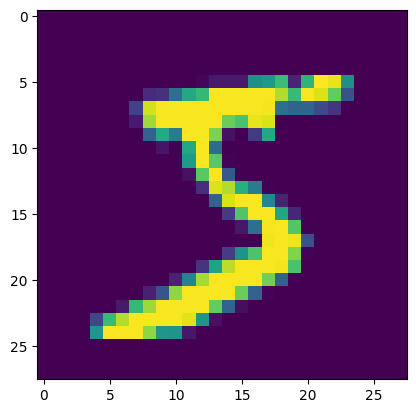

5


In [9]:
# displaying the image

plt.imshow(X_train[0])
plt.show()

# print the corresponding label
print(Y_train[0])

In [10]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
# printing the 10th image

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [18]:
# setting up the layers of the Neural  Network

model = keras.Sequential(
    [
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
    ]
                          )

In [19]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.9157
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1391 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1031 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0716 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0459 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

In [21]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9747
0.9746999740600586


In [22]:
print(X_test.shape)

(10000, 28, 28)


In [23]:
Y_pred = model.predict(X_test)
Y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.8755910e-03, 9.4413636e-03, 7.8832604e-02, ..., 9.9999559e-01,
        1.1258019e-02, 3.3745727e-01],
       [2.7241844e-03, 8.1230688e-01, 9.9999982e-01, ..., 3.5360861e-06,
        5.9445840e-01, 3.6907508e-07],
       [1.8917191e-05, 9.9932426e-01, 6.4389840e-02, ..., 5.5457729e-01,
        6.2583399e-01, 5.0438726e-03],
       ...,
       [3.0707643e-09, 7.3202337e-08, 1.3380605e-04, ..., 4.4900854e-03,
        2.2212290e-03, 3.2667637e-02],
       [4.7586440e-05, 2.8672417e-07, 9.6193283e-08, ..., 3.8778082e-05,
        8.7616765e-01, 1.5183130e-07],
       [1.2018576e-03, 5.1710504e-07, 3.2345839e-03, ..., 7.5790291e-11,
        3.7929782e-05, 4.0267023e-06]], dtype=float32)

In [24]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [25]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [26]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    0,    2,    4,    1,    3,    0],
       [   0, 1127,    2,    0,    0,    1,    2,    1,    2,    0],
       [   4,    3, 1007,    5,    2,    0,    3,    4,    4,    0],
       [   0,    0,    4,  978,    0,   11,    0,    6,    6,    5],
       [   0,    0,    4,    1,  964,    0,    3,    1,    0,    9],
       [   1,    1,    0,   10,    1,  870,    3,    2,    2,    2],
       [   3,    3,    4,    1,    3,    4,  936,    1,    3,    0],
       [   1,    7,   10,    1,    5,    0,    0,  998,    1,    5],
       [   3,    0,    5,    9,    8,    7,    1,    4,  932,    5],
       [   4,    4,    0,    4,   12,    6,    1,   11,    1,  966]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

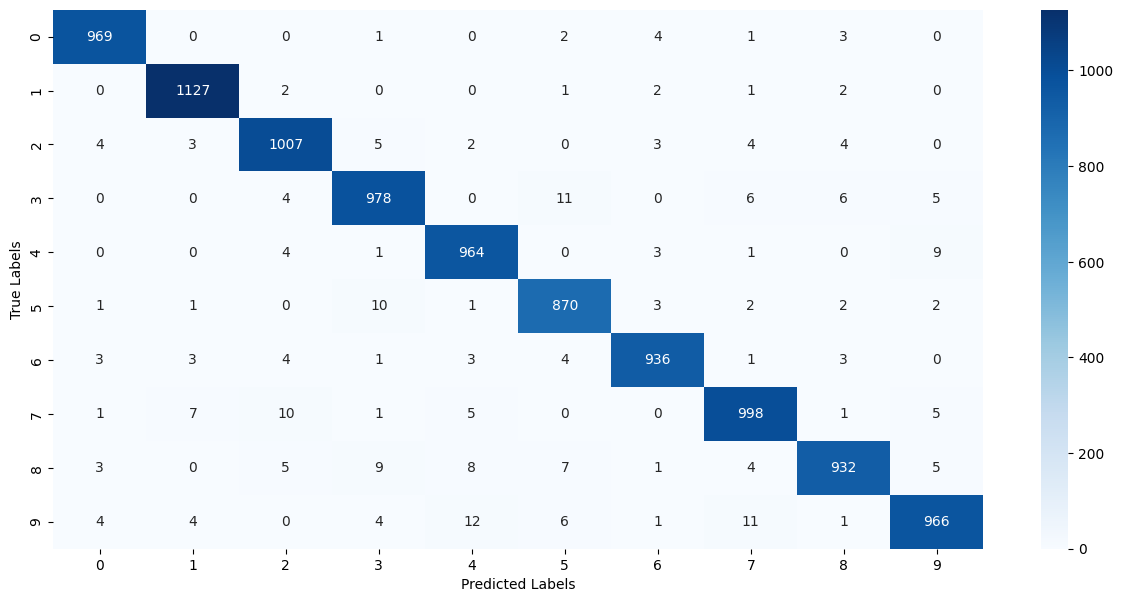

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [30]:
input_image_path = '/content/drive/MyDrive/April 2024/DL Project 2. MNIST Digit classification using NN/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [31]:
type(input_image)

numpy.ndarray

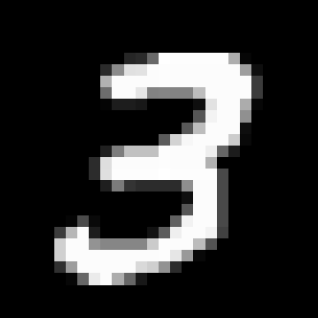

In [32]:
cv2_imshow(input_image)

In [33]:
input_image.shape

(318, 318, 3)

In [35]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

In [36]:
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

In [38]:
input_image_resize = input_image_resize/255
input_image_resize.shape

(28, 28)

In [40]:
input_image_resize

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])
image_reshaped

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])
image_reshaped

In [43]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 34ms/step
[[4.5011211e-10 3.1748070e-05 4.7654816e-04 1.0000000e+00 1.2230487e-09
  5.4900527e-01 2.0632054e-14 6.4023593e-03 1.0059873e-01 9.9427050e-01]]


In [44]:
input_pred_label = np.argmax(input_prediction)
input_pred_label

3

Path of the image to be predicted: /content/drive/MyDrive/April 2024/DL Project 2. MNIST Digit classification using NN/MNIST_digit.png


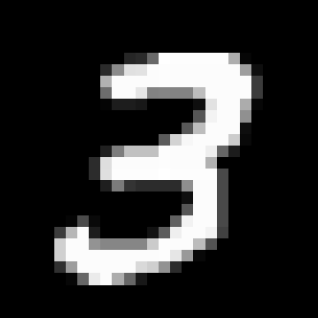

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

In [53]:
pickle.dump(model,file=open('/content/drive/MyDrive/April 2024/DL Project 2. MNIST Digit classification using NN/data.pkl', 'wb'))

In [55]:
Predict=pickle.load(open('/content/drive/MyDrive/April 2024/DL Project 2. MNIST Digit classification using NN/data.pkl', 'rb'))

Path of the image to be predicted: /content/drive/MyDrive/April 2024/DL Project 2. MNIST Digit classification using NN/Capture.PNG


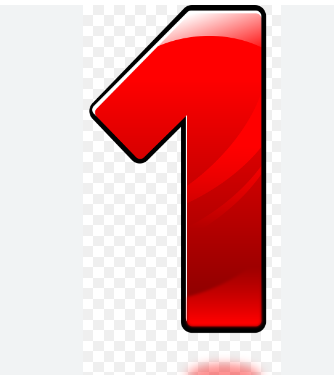

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = Predict.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)